# Mega Case Study

## Part 1 - SOM

### Importing the libraries

In [98]:
!pip install minisom

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [100]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Feature Scaling

In [101]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [102]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

### Training the SOM

In [103]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
#INITIALIZE THE WEIGHTS
som.random_weights_init(X)
#TRAIN THE WEIGHTS
som.train_random(data = X, num_iteration = 100,)

### Visualizing the results

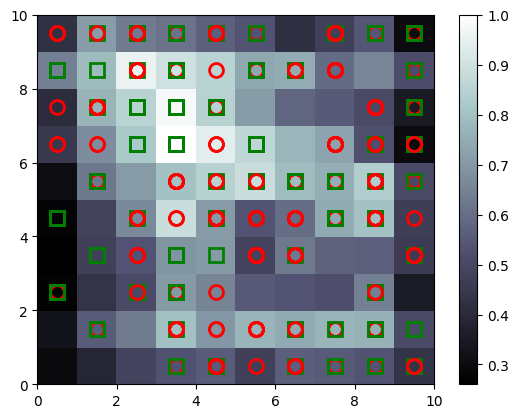

In [105]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize =10,
         markeredgewidth = 2)
show()


### Finding the frauds

In [106]:
maappings = som.win_map(X)
frauds = np.concatenate((maappings[(2,8)], maappings[(3,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

### Printing the fraudulent clients

In [107]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15609070
15575438
15636626
15638272
15649101
15643574
15600027
15753591
15797246
15751167
15778142
15802106
15812918
15812766
15784526
15808223


In [87]:
# prompt: print last column in X



## Part 2 - Going from Unsupervised to Supervised Deep Learning

### Creating the Matrix of Features

In [108]:
customers = dataset.iloc[:, 1:].values

In [109]:
customers

array([[1.000e+00, 2.208e+01, 1.146e+01, ..., 1.000e+02, 1.213e+03,
        0.000e+00],
       [0.000e+00, 2.267e+01, 7.000e+00, ..., 1.600e+02, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.958e+01, 1.750e+00, ..., 2.800e+02, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.883e+01, 9.540e+00, ..., 1.000e+02, 1.000e+00,
        1.000e+00],
       [0.000e+00, 2.742e+01, 1.450e+01, ..., 1.200e+02, 1.200e+01,
        1.000e+00],
       [1.000e+00, 4.100e+01, 4.000e-02, ..., 5.600e+02, 1.000e+00,
        1.000e+00]])

### Creating the Dependent Variable

In [110]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

## Part 3 - ANN

### Feature Scaling

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

### Building the ANN

In [112]:
from keras.layers import Dense
from keras.models import Sequential
ann = Sequential()

ann.add(Dense(units = 2, kernel_initializer ='uniform', activation = 'relu', input_dim =15))
ann.add(Dense(units = 1,kernel_initializer ='uniform', activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training the ANN

In [113]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9654 - loss: 0.6025
Epoch 2/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9815 - loss: 0.1947


### Predicting the test set results

In [114]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [116]:
y_pred

array([[1.56214230e+07, 2.49491376e-03],
       [1.57997850e+07, 4.44760825e-03],
       [1.57729410e+07, 1.15990415e-02],
       ...,
       [1.57163470e+07, 2.50473857e-01],
       [1.57062680e+07, 2.62749344e-01],
       [1.57355720e+07, 2.78993100e-01]])